In [0]:
import numpy as np
import pandas as pd
import os
import sys
from google.colab import files
import io


uploaded = files.upload()


trainset = pd.read_csv(io.BytesIO(uploaded['train.csv']))

Saving train.csv to train (3).csv


In [0]:
trainset.head

<bound method NDFrame.head of         id                              belongs_to_collection     budget  \
0        1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...   14000000   
1        2  [{'id': 107674, 'name': 'The Princess Diaries ...   40000000   
2        3                                                NaN    3300000   
3        4                                                NaN    1200000   
4        5                                                NaN          0   
5        6                                                NaN    8000000   
6        7                                                NaN   14000000   
7        8                                                NaN          0   
8        9  [{'id': 256377, 'name': 'The Muppet Collection...          0   
9       10                                                NaN    6000000   
10      11  [{'id': 1575, 'name': 'Rocky Collection', 'pos...    1000000   
11      12  [{'id': 48190, 'name': 'Revenge of the Nerds C

In [0]:
trainset.dtypes

id                         int64
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
Keywords                  object
cast                      object
crew                      object
revenue                    int64
dtype: object

In [0]:
trainset.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [0]:
trainset.shape

(3000, 23)

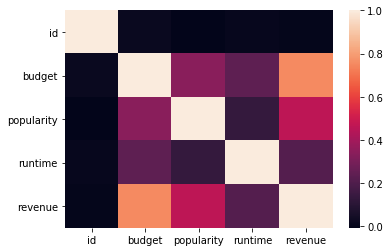

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.heatmap(trainset.corr())



In [0]:
trainset.cast.unique()

array(["[{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}, {'cast_id': 5, 'character': 'Nick', 'credit_id': '52fe4ee7c3a36847f82afaeb', 'gender': 2, 'id': 64342, 'name': 'Craig Robinson', 'order': 1, 'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'}, {'cast_id': 6, 'character': 'Jacob', 'credit_id': '52fe4ee7c3a36847f82afaef', 'gender': 2, 'id': 54729, 'name': 'Clark Duke', 'order': 2, 'profile_path': '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'}, {'cast_id': 7, 'character': 'Adam Jr.', 'credit_id': '52fe4ee7c3a36847f82afaf3', 'gender': 2, 'id': 36801, 'name': 'Adam Scott', 'order': 3, 'profile_path': '/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg'}, {'cast_id': 8, 'character': 'Hot Tub Repairman', 'credit_id': '52fe4ee7c3a36847f82afaf7', 'gender': 2, 'id': 54812, 'name': 'Chevy Chase', 'order': 4, 'profile_path': '/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg'}, {'cast_id': 9, 'ch

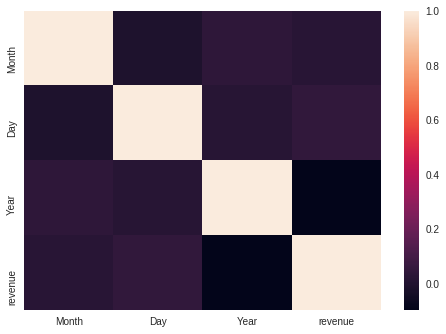

In [0]:
trainset[['Month','Day', 'Year']] = trainset['release_date'].str.split('/',expand=True)
trainset_release_date = trainset[['Month', 'Day', 'Year', 'revenue']]
trainset_release_date

trainset_release_date = trainset_release_date.astype(float)

trainset_release_date

cor = trainset_release_date.corr()

sns.heatmap(cor)

trainset = trainset.drop(['Year'], axis=1)



NameError: ignored

In [0]:
import ast
droped = train.crew.dropna()
parsed = list(map(lambda x: ast.literal_eval(x), droped.values))

res = [j for i in parsed for j in i] ## junta tudo no mesmo array, pronto para contagem

len(set(map(lambda x: x['name'], res))) ## mapeia o id de cada pos do array, e mete num set que n permite repetições 

3

In [0]:
from tpot import TPOTClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

X = trainset.drop(['revenue'])
Y = trainset.revenue
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    train_size=0.75, test_size=0.25)

tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_mnist_pipeline.py')

ModuleNotFoundError: ignored

In [0]:
!pip install tpot

    100% |████████████████████████████████| 81kB 4.5MB/s 
    100% |████████████████████████████████| 942kB 22.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
  Stored in directory: /root/.cache/pip/wheels/22/ea/bf/dc7c8a2262025a0ab5da9ef02282c198be88902791ca0c6658
Successfully built stopit deap


In [0]:
from tpot import TPOTClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

X = trainset.drop(['revenue'], axis=1)
X = pd.get_dummies(X).values
Y = trainset.revenue
Y = Y.values
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    train_size=0.75, test_size=0.25)

tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_mnist_pipeline.py')

NameError: ignored